## Introdução

O principal objetivo do projeto é criar insights para buscar as melhores oportunidades de compra, levando em consideração localidade e outros atributos que as casas possuem, e revendê-las a um bom preço.

O negócio dessa empresa fictícia é a compra de casas para revenda. Ela sempre está buscando boas oportunidades para ter lucro.

1 - Quais casas comprar?

2 - Qual o período mais interessante para as vendas?

3 - Seria interessante reformar as casas?

4 - Uma reforma aumentaria o preço de venda?

Usarei como base de dados [este dataset](https://www.kaggle.com/harlfoxem/housesalesprediction) retirado do Kaggle para explorar como foram as vendas de casas nesta localização e tentar responder as perguntas acima. Este dataset possui dados de vendas de casas entre os anos de 2014 e 2015.

In [1]:
# bibliotecas - manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# mapas
import folium
from folium import plugins

# manipulação de datas
import datetime as dt

# regressão linear
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

# estatística
from scipy import stats
from scipy.stats import norm, skewnorm
import statsmodels.formula.api as sm

# setando styles e opções
plt.style.use("seaborn-muted")
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # formato de números decimais 

%matplotlib inline

In [2]:
# carregamento dos dados
path = './dados/'
df = pd.DataFrame(pd.read_csv(path+'kc_house_data.csv'))

### Análise exploratória dos dados

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


Descrição das colunas de dados:

- **date -** data da venda da casa
- **price -** preço de cada casa vendida
- **bedrooms -** Número de quartos
- **bathrooms -** Número de banheiros, onde 0.5 corresponde a um quarto com banheiro, mas sem chuveiro
- **sqft_living -** metragem quadrada do espaço interior
- **sqft_lot -** metragem quadrada do lote de terreno
- **floors -** Número de andares
- **waterfront -** uma variável fictícia para saber se o apartamento tinha vista para a beira-mar ou não
- **view -** Um índice de 0 a 4 de quão boa era a vista da propriedade
- **condition -** um índice de 1 a 5 sobre a condição da casa
- **grade -** Um índice de 1 a 13, onde 1-3 fica aquém da construção e design do edifício, 7 tem um nível médio de construção e design de 11-13 tem um nível de construção e design de alta qualidade
- **sqft_above -** a metragem quadrada do espaço habitacional interno que está acima do nível do solo
- **sqft_basement -** a metragem quadrada do espaço habitacional interno que está abaixo do nível do solo
- **yr_built -** O ano em que a casa foi construída inicialmente
- **yr_renovated -** O ano da última reforma da casa
- **zipcode -** em que área do código postal se encontra a casa
- **lat -** Latitude
- **long -** Longitude
- **sqft_living15 -** A metragem quadrada do espaço interno de habitação para os 15 vizinhos mais próximos
- **sqft_lot15 -** A metragem quadrada dos lotes de terreno dos 15 vizinhos mais próximos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
type(df['date'].iloc[0])

str

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Verificando as variáveis disponíveis, é possível identificar os atributos das casas e também os tipos dos dados. Os seguintes pontos foram observados:

- O tipo do atributo date (data) é string
- O atributo price (preço) já está no formato float
- O atributo bathrooms (banheiros) possui formato float. Analisando a explicação desse atributo, foi constatado que 0.5 corresponde a um quarto com banheiro, mas sem chuveiro
- Não existem dados missing

In [7]:
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 21613
Colunas: 21


O tamanho do dataset é razoável

In [8]:
print(f'Valor da variável do ano de construção: {df["yr_built"][0]}')
print(f'Valor da variável do ano da última reforma: {df["yr_renovated"][1]}')

Valor da variável do ano de construção: 1955
Valor da variável do ano da última reforma: 1991


As variáveis de ano de construção e ano da última reforma já estão no formato desejado, contendo apenas o ano e no tipo int64.

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
type(df['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Converti a variável date para DateTime, pois a mesma, como citado acima, estava como tipo str.

### Preço

In [11]:
pd.DataFrame(df['price'].describe())

,price
count,21613.00
mean,540088.14
std,367127.20
min,75000.00
25%,321950.00
50%,450000.00
75%,645000.00
max,7700000.00


A média de preços praticados está em **540088.0**. Nota-se também o desvio padrão **(367127.0)** elevado, ou seja, bem longe da média **(540088.0)**, indicando possíveis outliers. A casa mais cara custou **7700000.0**. A casa mais barata custou **75000.0**.
Quanto aos quartis, vemos uma grande diferença entre as casas do Q1 **321950.0** e Q3 **645000.0**. 

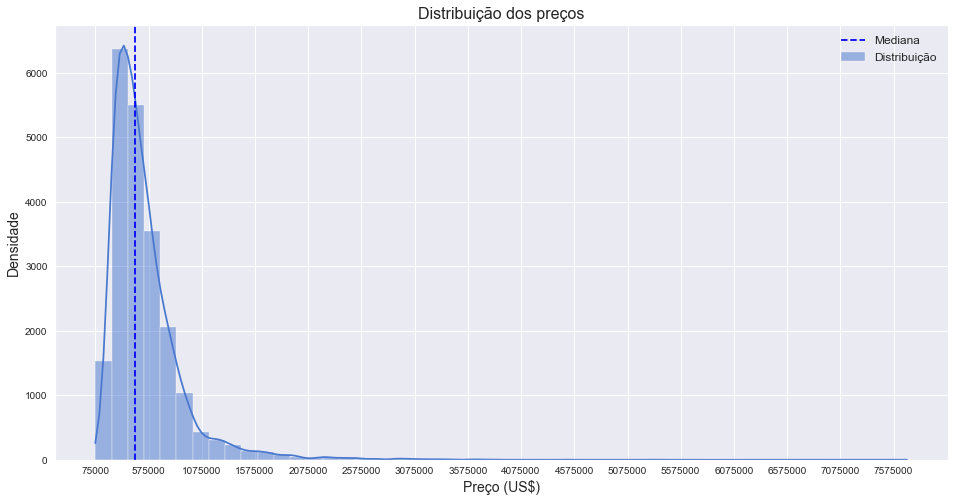

In [12]:
m_price = df['price'].median() # mediana dos preços

f, ax = plt.subplots(figsize=(16, 8)) # tamanho da figura
sns.histplot(ax=ax, data=df, x='price', label='Distribuição', kde=True, bins=50)
# gráfico de distribuição
plt.axvline(m_price, c='#0000FF', ls='--', label='Mediana') # configuração da linha da mediana
plt.ticklabel_format(style='plain', axis='x') # formatação da linha da mediana
plt.title('Distribuição dos preços', fontsize=16) # título do gráfico
plt.xlabel('Preço (US$)', fontsize=14) # título do eixo x
plt.ylabel('Densidade', fontsize=14) # título do eixo y - grau de concentração dos preços em determinado valor
# posição dos ticks do eixo x - do preço min ao max, pulando de 500000
plt.xticks(np.arange(df['price'].min(), df['price'].max(), step=500000, size=10)

plt.legend(fontsize=12)
plt.show()

Não há uma distribuição normal. A concentração de preços está mais à esquerda e existe uma assimetria à direita. Os preços mais altos se encontram entre **250000.0 ~ 575000.0**. A partir de **1075000.0** nota-se uma diminuição do número de casas dessa faixa de preço em diante.

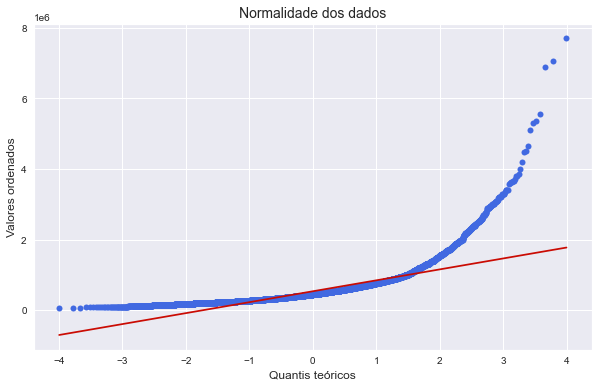

In [13]:
f, ax = plt.subplots(figsize=(10, 6))

stats.probplot(df['price'], fit=True, plot=ax)
ax.set_title('Normalidade dos dados', fontsize=14)
ax.set_xlabel('Quantis teóricos', fontsize=12)
ax.set_ylabel('Valores ordenados', fontsize=12)

ax.get_lines()[0].set_color('#4169E1')
ax.get_lines()[0].set_markersize(6.0)

plt.show()

### Condition and Grade

In [15]:
pd.DataFrame(df['condition'].value_counts().sort_index())

,condition
1,30
2,172
3,14031
4,5679
5,1701


Poucas casas possuem condição péssima ou ruim. A maior proporção de casas está na condição média. Há considerável número de casas em boas condições e quantidade menor em ótimas condições.

In [16]:
pd.DataFrame(df['grade'].value_counts().sort_index())

,grade
1,1
3,3
4,29
5,242
6,2038
7,8981
8,6068
9,2615
10,1134
11,399


Nota-se uma distribuição normal do grau de construção das casas, concentrando o maior número de casas próximo a média e diminuindo conforme o grau de construção aumenta.

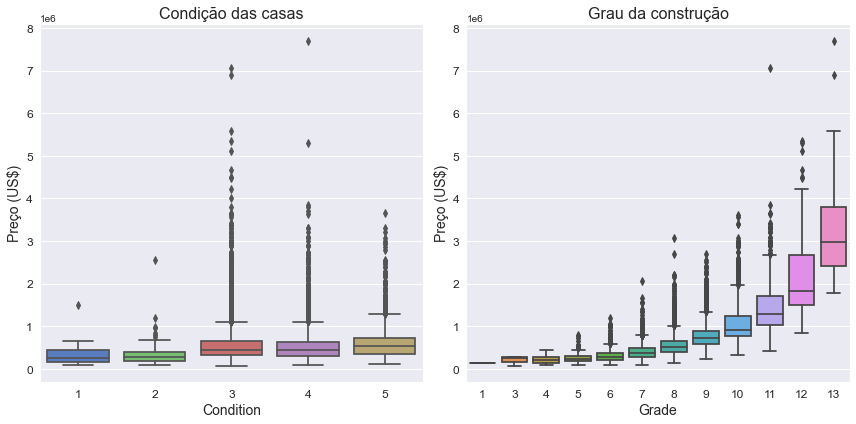

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.boxplot(data=df, x='condition', y='price')
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Preço (US$)', fontsize=14)
plt.title('Condição das casas', fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(122)
sns.boxplot(data=df, x='grade', y='price')
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Preço (US$)', fontsize=14)
plt.title('Grau da construção', fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()
plt.show()

A mediana dos preços não varia muito em relação a condição das casas. Nota-se um grande número de outliers, com destaque aos níveis 3, 4 e 5. Podemos dizer que a condição da casa não impacta consideravelmente no aumento dos preços.

Já quando falamos do grau de construção, podemos notar que conforme a qualidade dos materiais usados aumenta, o preço também aumenta. Veja que a mediana acompanha a subida dos níveis.

### Correlação com o Preço

In [18]:
n = df._get_numeric_data() # separando variáveis numéricas
n.drop('id', axis=1, inplace=True)
n.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,-0.18,0.11,0.20,0.71,0.12


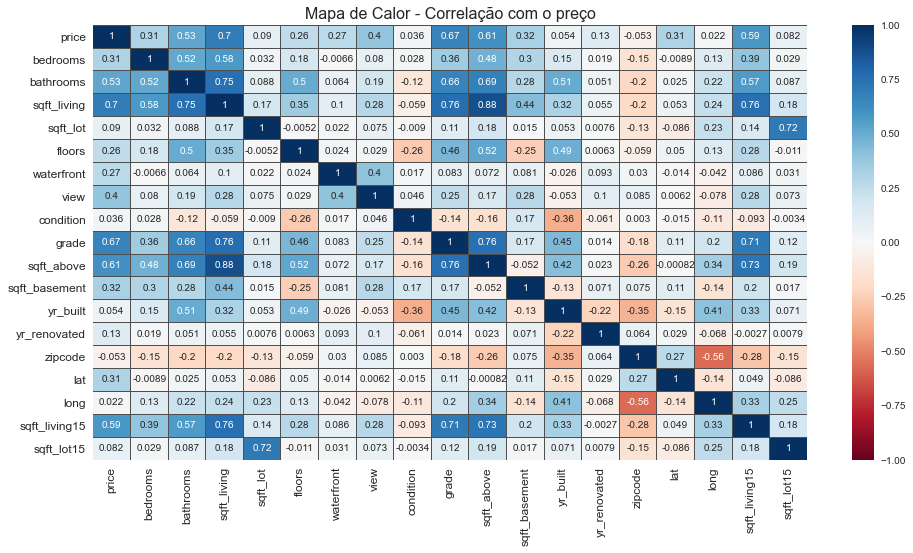

In [19]:
# mapa de calor - correlação entre preço e demais atributos
n_corr = n.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(n_corr, linecolor='#4F4F4F', lw=0.01, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Correlação com o preço', fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [20]:
n_corr[n_corr['price'] >= 0.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,-0.18,0.11,0.20,0.71,0.12
sqft_above,0.61,0.48,0.69,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.00,-0.05,0.42,0.02,-0.26,-0.00,0.34,0.73,0.19
sqft_living15,0.59,0.39,0.57,0.76,0.14,0.28,0.09,0.28,-0.09,0.71,0.73,0.20,0.33,-0.00,-0.28,0.05,0.33,1.00,0.18


Alguns atributos possuem forte correlação com o preço. Selecionei os com valores > 0.5. Mesmo a coluna **bedrooms** não aparecendo nesse filtro, irei analisá-la pelo fato de que, geralmente, número de quartos influencia no preço de uma casa.

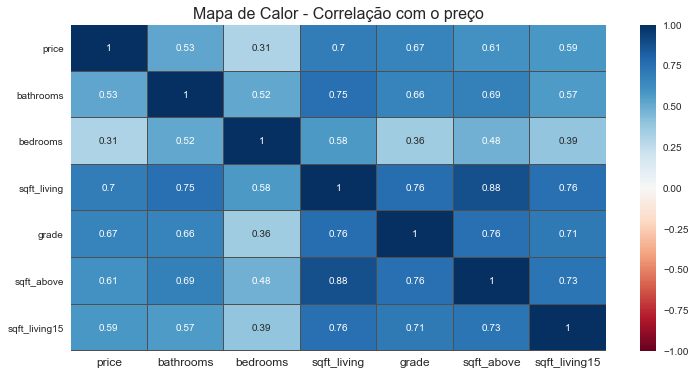

In [5]:
c = df[['price', 'bathrooms', 'bedrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
c_corr = c.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(c_corr, linecolor='#4F4F4F', lw=0.01, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Correlação com o preço', fontsize=16)
plt.xticks(size=12)
plt.yticks(size=10)
plt.show()

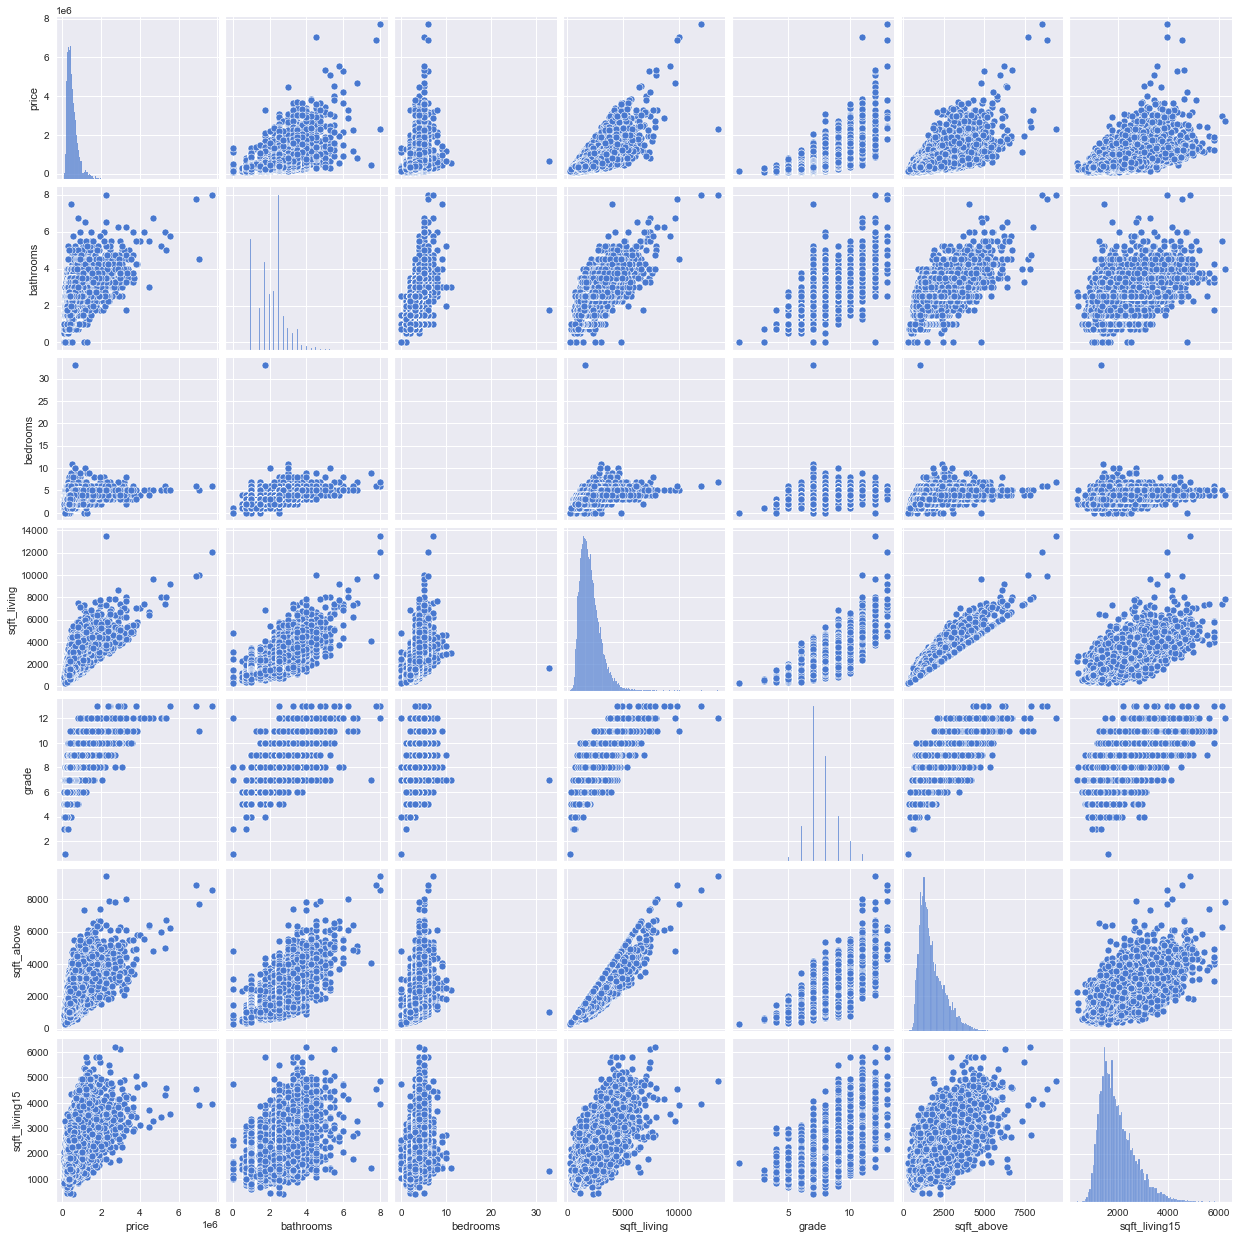

In [7]:
sns.pairplot(c)

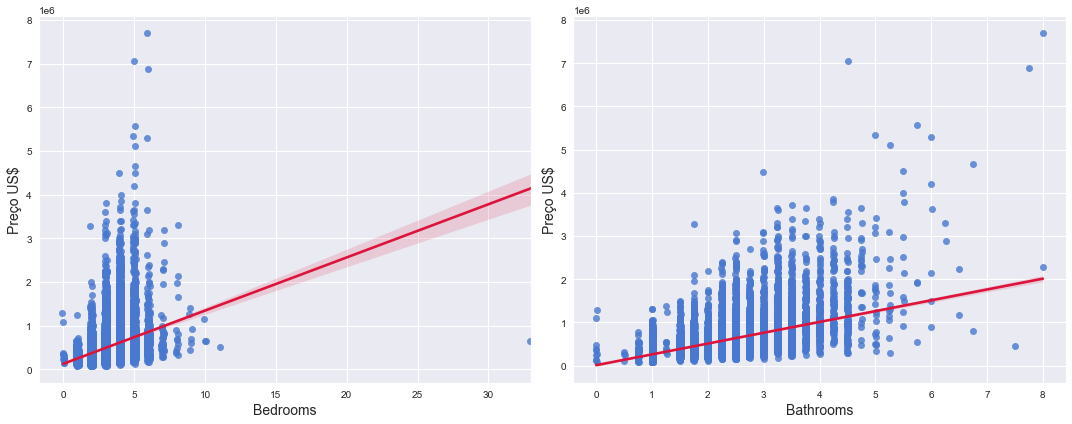

In [22]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.regplot(data=c, x='bedrooms', y='price', x_jitter=0.1, line_kws={'color': '#DC143C'})
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Preço US$', fontsize=14)

plt.subplot(122)
sns.regplot(data=c, x='bathrooms', y='price', x_jitter=0.01, line_kws={'color': '#DC143C'})
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Preço US$', fontsize=14)

plt.tight_layout()
plt.show()

### Regressão Linear

In [23]:
# X = variável independente (price)
# y = variável dependente (bathrooms)
X = c['bathrooms'].values
y = c['price'].values

In [24]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [25]:
# correlação entre bathrooms e price
corr = np.corrcoef(X, y)
corr

array([[1.        , 0.52513751],
       [0.52513751, 1.        ]])

In [26]:
X = X.reshape(-1, 1)

# criação do modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [27]:
X

array([[1.  ],
       [2.25],
       [1.  ],
       ...,
       [0.75],
       [2.5 ],
       [0.75]])

In [28]:
# coeficiente
round(modelo.intercept_, 2)

10708.31

In [29]:
# inclinação
modelo.coef_

array([250326.5163021])

In [30]:
# R-quadrado
modelo.score(X, y)

0.27576939959239877

In [31]:
modelo_ajustado = sm.ols(formula='price ~ bathrooms', data=df)
modelo_treino = modelo_ajustado.fit()
modelo_treino.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:34:46   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+04   6210.669      1.724      0.085   -1465.060    2.29e+04
bathrooms   2.503e+05   2759.528     90.714      0.000    2.45e+05    2.56e+05
==============================================================================
Omnibus:                    17286.361   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887102.351
Skew:                           3.458   Prob(JB):                         0.00
Kurtosis:                      33.614   Cond. No.                         7.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

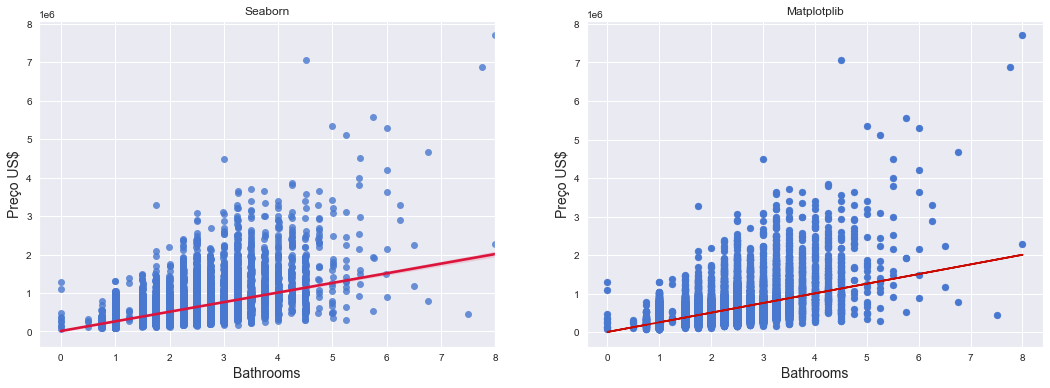

In [32]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
sns.regplot(data=c, x=X, y=y, line_kws={'color': '#DC143C'}, x_jitter=0.01)
plt.title('Seaborn')
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Preço US$', fontsize=14)

plt.subplot(122)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), c='r')
plt.title('Matplotplib')
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Preço US$', fontsize=14)

plt.show()

In [33]:
# previsão do price para 7 bathrooms - forma 1
modelo.intercept_ + modelo.coef_ * 7

array([1762993.9226451])

In [34]:
# previsão do price para 7 bathrooms - forma 2 com sklearn
modelo.predict([[7]])

array([1762993.9226451])

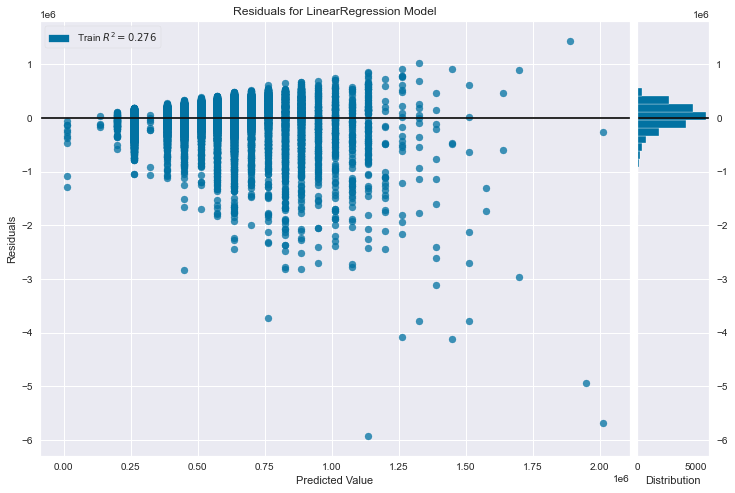

In [35]:
# resíduos - diferença entre os dados e a linha de regressão
plt.figure(figsize=(12, 8))
vis = ResidualsPlot(modelo, )
vis.fit(X, y)
vis.poof()
plt.show()

In [36]:
X1 = df.iloc[:, 3:6]
X1

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680
...,...,...,...
21608,3,2.50,1530
21609,4,2.50,2310
21610,2,0.75,1020
21611,3,2.50,1600


In [37]:
y1 = df.iloc[:, 2].values
modelo2 = LinearRegression()
modelo2.fit(X1, y1)
modelo2.score(X1, y1)

0.5069197973159074

In [38]:
modelo_ajustado2 = sm.ols(formula='price ~ bedrooms + bathrooms + sqft_living', data=df)
modelo_treino2 = modelo_ajustado2.fit()
modelo_treino2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7405.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:35:04   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.485e+04   6913.667     10.826      0.000    6.13e+04    8.84e+04
bedrooms    -5.786e+04   2334.607    -24.784      0.000   -6.24e+04   -5.33e+04
bathrooms    7932.7122   3510.556      2.260      0.024    1051.764    1.48e+04
sqft_living   309.3924      3.087    100.231      0.000     303.342     315.443
==============================================================================
Omnibus:                    14449.284   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494615.261
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.787   Cond. No.                     9.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
prev = np.array([4, 4, 2000])
prev = prev.reshape(1, -1)
price_previsto = modelo2.predict(prev)

print(f'A previsão de preço para uma casa com 4 quartos, 4 banheiros e '
      f'uma área de 2000 é de: US$ {price_previsto[0]:.2f}')

A previsão de preço para uma casa com 4 quartos, 4 banheiros e uma área de 2000 é de: US$ 493919.19


Quis analisar esses dois atributos separadamente por serem os mais comuns quando se procura pela compra de uma casa.

O valor das casas aumenta conforme o número de quartos. Com 6 quartos, o valor ainda é alto mas a partir desse ponto, não se nota influência desse atributo no aumento do preço. Pode-se considerar que casas com até 5 quartos possuem valores mais altos.

Casas com 3 e 4.5 banheiros são mais caras, indicando que esse atibuto possui influência no preço final. Há dispersão a partir desse ponto. Vale resaltar que o valor do atributo **bathrooms** é float, indicando que dentre os banheiros disponíveis, alguns estão nos quartos e não possuem chuveiro.

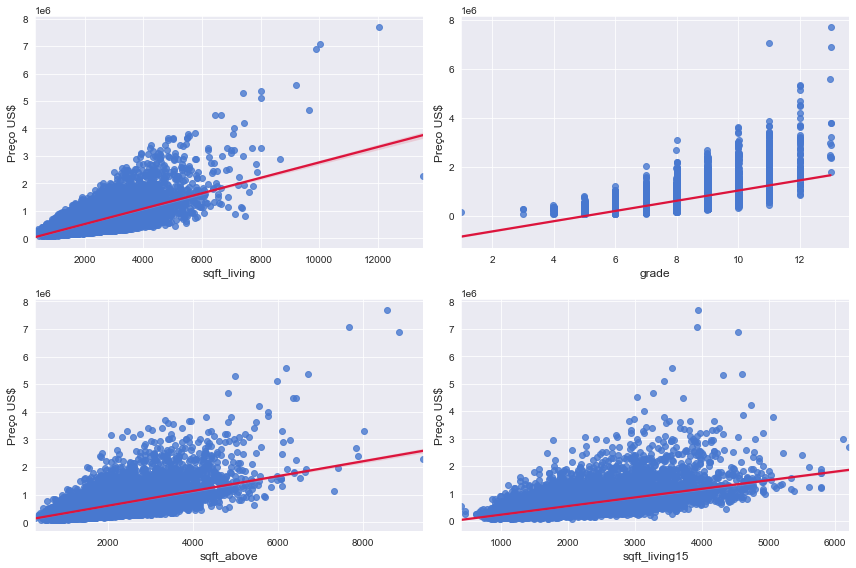

In [12]:
plt.figure(figsize=(12, 8))
i = 1
for n in c:
    if n == 'price' or n == 'bedrooms' or n == 'bathrooms':
        continue
    plt.subplot(2, 2, i)
    sns.regplot(data=df, x=n, y='price', x_jitter=0.01, line_kws={'color': '#DC143C'})
    plt.ylabel('Preço US$', fontsize=12)
    plt.xlabel(n, fontsize=12)
    i += 1
    
plt.tight_layout()
plt.show()

Observando os atributos acima:
- **sqft_living** metragem quadrada da área interna da casa, quanto maior, maior o preço. A partir de 7000 notamos uma dispersão.
- **grade** a qualidade dos materais usados na construção, quanto de maior qualidade, mais impacta no preço de venda.
- **sqft_above** metragem quadrada da área acima do nível do solo, possui influência no preço de venda. Possui dispersão a partir de 5000.
- **sqft_living15** metragem quadrada da área interna da casa para os 15 vizinhos mais próximos, também influencia no preço de venda, havendo dispersão a partir de 4500.

### Localização

In [23]:
df_casas_caras = df[df['price'] >= 1000000]

In [58]:
coordenadas=[]

df_geo = df_casas_caras.sample(frac=0.30)
for lat,lng in zip(df_geo.lat.values,df_geo.long.values):
    coordenadas.append([lat, lng])

mapa = folium.Map(location=[47.4325157, -122.0835657],
                  zoom_start=9.5)

# mapa de calor
# mapa.add_child(plugins.HeatMap(coordenadas))

for coordenada in coordenadas:
    folium.Marker(
    coordenada,
    icon=folium.Icon(color='blue', icon='home'),
    ).add_to(mapa)

mapa

No mapa acima uma amostra de casas com preços iguais ou superiores a `US$ 1000000`. É possível notar que algumas dessas casas estão localizadas as margens de braços do oceano pacífico, a beira do Green Lake e também ao centro. Outro ponto de destaque é que também estão próximas a parques, estradas e linhas férreas. A sede do condado é Seattle, cidade portuária que possui diversos atrativos e também é um grande centro financeiro, comercial, industrial e turístico. Toda essa região abrange pontos turísticos, como o obsevatório Space Needle e o Seattle Art Museum.

### Waterfront and View

In [25]:
pd.DataFrame(df['waterfront'].value_counts())

,waterfront
0,21450
1,163


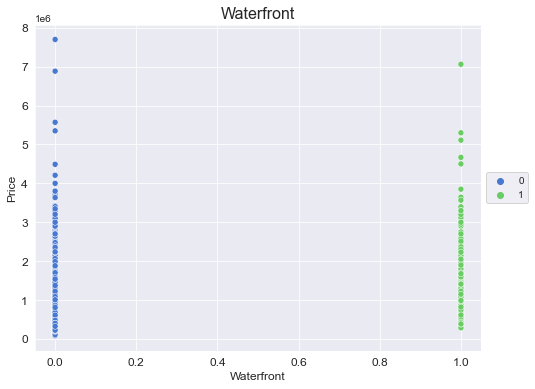

In [26]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='waterfront', y='price', hue='waterfront')
plt.title('Waterfront', fontsize=16)
plt.xticks(size=12)
plt.xlabel('Waterfront', fontsize=12)
plt.yticks(size=12)
plt.ylabel('Price', fontsize=12)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Não é um atibuto que influencia o preço de venda, visto que tendo ou não vista para o mar, nota-se a mesma variação de valor.

In [27]:
pd.DataFrame(df['view'].value_counts())

,view
0,19489
2,963
3,510
1,332
4,319


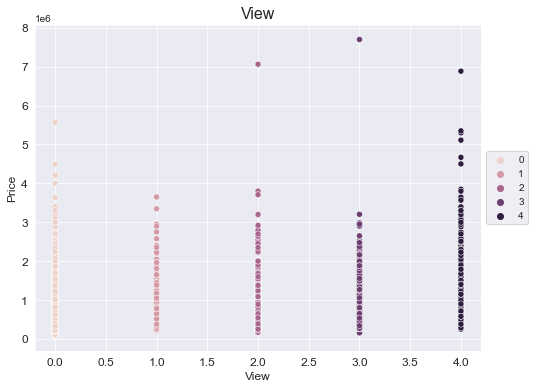

In [28]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='view', y='price', hue='view')
plt.title('View', fontsize=16)
plt.xticks(size=12)
plt.xlabel('View', fontsize=12)
plt.yticks(size=12)
plt.ylabel('Price', fontsize=12)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

A vista também não é um atributo relevante, mesmo possuindo outliers. Em qualquer classificação, os preços vão até 4 000 000.

### Períodos de vendas

In [29]:
# separando os semestres
df = df.assign(semestre = ((df['date'].dt.month >= 1) & (df['date'].dt.month <= 6)).astype(int))

In [30]:
# separando os trimestres
df['quarter'] = df['date'].dt.quarter

In [31]:
trimestre = df.groupby('quarter')['price'].count()
trimestre

quarter
1    4103
2    6825
3    5925
4    4760
Name: price, dtype: int64

In [32]:
semestre = df.groupby('semestre')['price'].count()

In [33]:
semestre.index = [1, 2]
semestre

1    10685
2    10928
Name: price, dtype: int64

In [34]:
mp_semestre = df.groupby('semestre')['price'].median()
mp_trimestre = df.groupby('quarter')['price'].median()
mp_trimestre

quarter
1   440000.00
2   465950.00
3   450000.00
4   438975.00
Name: price, dtype: float64

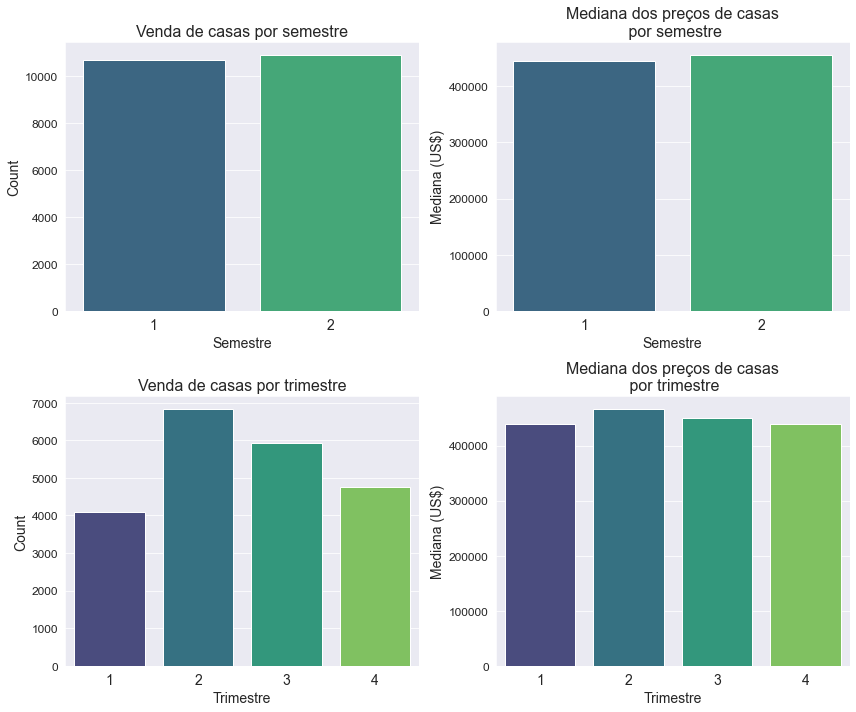

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
sns.barplot(x=semestre.index, y=semestre, palette='viridis')
plt.title('Venda de casas por semestre', fontsize=16)
plt.xticks(size=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(size=12)
plt.xlabel('Semestre', fontsize=14)

plt.subplot(222)
sns.barplot(x=semestre.index, y=mp_semestre, palette='viridis')
plt.title('Mediana dos preços de casas\n por semestre', fontsize=16)
plt.xticks(size=14)
plt.xlabel('Semestre', fontsize=14)
plt.yticks(size=12)
plt.ylabel('Mediana (US$)', fontsize=14)

plt.subplot(223)
sns.barplot(x=trimestre.index, y=trimestre, palette='viridis')
plt.title('Venda de casas por trimestre', fontsize=16)
plt.xticks(size=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(size=12)
plt.xlabel('Trimestre', fontsize=14)

plt.subplot(224)
sns.barplot(x=trimestre.index, y=mp_trimestre, palette='viridis')
plt.title('Mediana dos preços de casas\n por trimestre', fontsize=16)
plt.xticks(size=14)
plt.xlabel('Trimestre', fontsize=14)
plt.yticks(size=12)
plt.ylabel('Mediana (US$)', fontsize=14)

plt.tight_layout()
plt.show()

Avaliando os períodos do ano, por semestre não se nota grande diferença, tanto na quantidade de casas vendidas com mais de 10000, quanto na mediana dos preços, variando acima de `US$ 400000`. Por trimestre, vemos um número maior de vendas no segundo e terceiro quarters do ano, porém, a mediana dos preços é até mais alta em relação aos outros quarters, mas todas também acima de `US$ 400000`.

### Floors

In [36]:
pd.DataFrame(df['floors'].value_counts())

,floors
1.00,10680
2.00,8241
1.50,1910
3.00,613
2.50,161
3.50,8


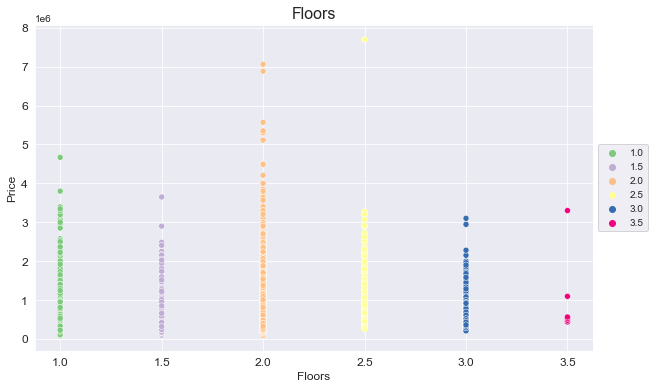

In [37]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='floors', y='price', hue='floors', palette='Accent')
plt.title('Floors', fontsize=16)
plt.xticks(size=12)
plt.xlabel('Floors', fontsize=12)
plt.yticks(size=12)
plt.ylabel('Price', fontsize=12)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Casas que possuem de 1 a 2 andares custam em torno de 4 000 000. É percebido também outliers e pode-se notar até um valor um pouco menor para casas com mais andares, mas próximo disso.

### Anos de construção

In [38]:
print(f"Menor ano de construção: {df['yr_built'].min()}")
print(f"Maior ano de construção: {df['yr_built'].max()}")

Menor ano de construção: 1900
Maior ano de construção: 2015


**Separando as casas em décadas de construção**

In [39]:
datas = pd.DataFrame(df['yr_built'], columns=['yr_built'])
anos = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
labels = ['1900-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960',
          '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020']
# cut - transforma vairável contínua em categórica
df['dc_built'] = pd.cut(datas['yr_built'], bins=anos, labels=labels)

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,semestre,quarter,dc_built
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,0,4,1951-1960
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,0,4,1951-1960
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,1,1,1931-1940
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,0,4,1961-1970
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,1,1,1981-1990


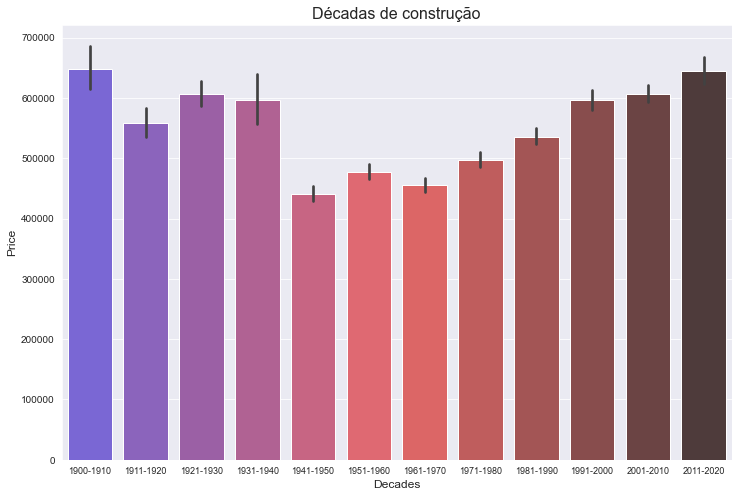

In [41]:
plt.figure(figsize=(12, 8))

sns.barplot(data=df,x='dc_built', y='price', palette='seismic_d')

plt.title('Décadas de construção', fontsize=16)
plt.xticks(size=9)
plt.xlabel('Decades', fontsize=12)
plt.yticks(size=10)
plt.ylabel('Price', fontsize=12)

plt.show()

É possível notar variações de preços acima de 500000 entre casas construídas nas décadas de 1900-1940. Construções de 1941 até 1970 tiveram uma leve queda e algumas variações nos preços, para retomarem uma alta a partir de 1971, igualando o patamar de casas dos anos 1900.

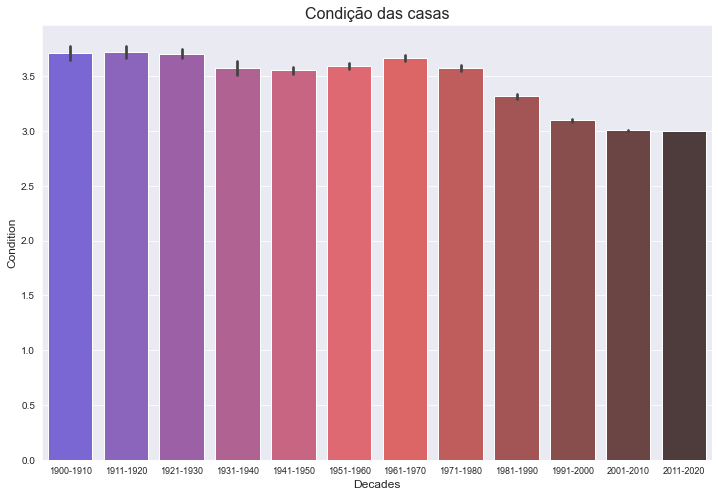

In [42]:
plt.figure(figsize=(12, 8))

sns.barplot(data=df,x='dc_built', y='condition', palette='seismic_d')

plt.title('Condição das casas', fontsize=16)
plt.xticks(size=9)
plt.xlabel('Decades', fontsize=12)
plt.yticks(size=10)
plt.ylabel('Condition', fontsize=12)

plt.show()

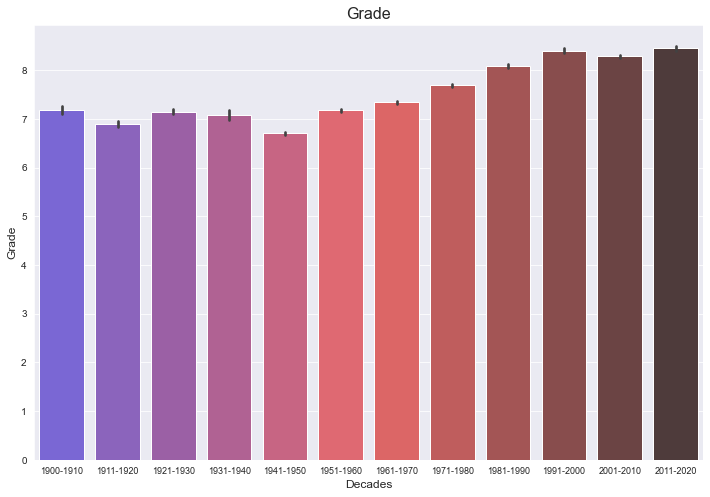

In [43]:
plt.figure(figsize=(12, 8))

sns.barplot(data=df,x='dc_built', y='grade', palette='seismic_d')

plt.title('Grade', fontsize=16)
plt.xticks(size=9)
plt.xlabel('Decades', fontsize=12)
plt.yticks(size=10)
plt.ylabel('Grade', fontsize=12)

plt.show()

Casas construídas na década de 1960 possuem condições melhores, mas o nível de construção e design são menores. Casas contruídas a partir de 1991, além de ótima qualidade na construção, possuem boas condições.

### Grupos de preços

In [44]:
print(f"Menor preço: {df['price'].min()}")
print(f"Maior preço: {df['price'].max()}")

Menor preço: 75000.0
Maior preço: 7700000.0


**Separando as casas em grupos de preços**

In [45]:
prices = pd.DataFrame(df['price'], columns=['price'])
precos = [0, 250000, 500000, 1000000, 10000000]
labels = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
df['gp_prices'] = pd.cut(prices['price'], bins=precos, labels=labels)

In [46]:
df[df['yr_built'] < 1991]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,semestre,quarter,dc_built,gp_prices
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,0,4,1951-1960,Grupo 1
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,0,4,1951-1960,Grupo 3
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,1,1,1931-1940,Grupo 1
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,0,4,1961-1970,Grupo 3
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,1,1,1981-1990,Grupo 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21303,522059130,2015-04-29,465000.00,3,1.00,1150,18200,1.00,0,0,5,7,1150,0,1959,0,98058,47.43,-122.19,1714,18200,1,2,1951-1960,Grupo 2
21332,9266700190,2015-05-11,245000.00,1,1.00,390,2000,1.00,0,0,4,6,390,0,1920,0,98103,47.69,-122.35,1340,5100,1,2,1911-1920,Grupo 1
21343,2924079034,2014-09-25,332220.00,3,1.50,2580,47480,1.00,0,0,3,7,1360,1220,1953,0,98024,47.53,-121.93,1760,48181,0,3,1951-1960,Grupo 2
21470,121039156,2015-01-09,249000.00,3,1.00,1030,24750,1.00,0,2,3,5,1030,0,1943,0,98023,47.33,-122.36,2810,28800,1,1,1941-1950,Grupo 1


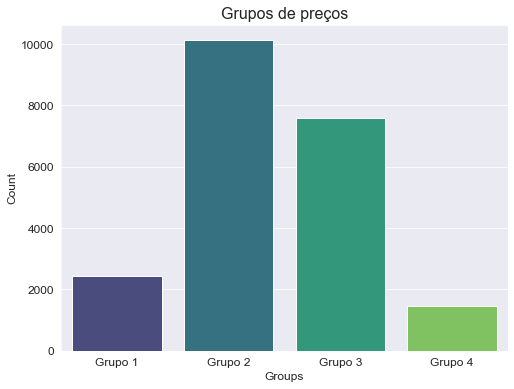

In [47]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='gp_prices', palette='viridis')

plt.title('Grupos de preços', fontsize=16)
plt.xticks(size=12)
plt.xlabel('Groups', fontsize=12)
plt.yticks(size=12)
plt.ylabel('Count', fontsize=12)

plt.show()

In [48]:
pd.DataFrame(df.groupby('gp_prices')['gp_prices'].count())

,gp_prices
gp_prices,
Grupo 1,2433
Grupo 2,10127
Grupo 3,7588
Grupo 4,1465


A grande maioria das casas estão nos grupos 2 e 3, nas faixas de preço que vão de 250 000 a 1 000 000.

### Casas reformadas

In [49]:
df = df.assign(reformada = (df['yr_renovated'] > 0).astype(int))
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,semestre,quarter,dc_built,gp_prices,reformada
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,0,4,1951-1960,Grupo 1,0
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,0,4,1951-1960,Grupo 3,1
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,1,1,1931-1940,Grupo 1,0
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,0,4,1961-1970,Grupo 3,0
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,1,1,1981-1990,Grupo 3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509,1,2,2001-2010,Grupo 2,0
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200,1,1,2011-2020,Grupo 2,0
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007,1,2,2001-2010,Grupo 2,0
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287,1,1,2001-2010,Grupo 2,0


In [50]:
pd.DataFrame(df.groupby('reformada')['price'].count())

,price
reformada,
0,20699
1,914


In [51]:
# usarei a mediana dos preços, pois a média sofre influência dos outliers
mp_reformada = df.groupby('reformada')['price'].median()
reformada = df.groupby('reformada')['price'].count()

In [52]:
n_ref_pct = reformada[0]/reformada.sum()
ref_pct = reformada[1]/reformada.sum()
ref = [round(n_ref_pct*100, 2), round(ref_pct*100, 2)]
ref

[95.77, 4.23]

In [53]:
reformada.index = ['Não', 'Sim']
reformada

Não    20699
Sim      914
Name: price, dtype: int64

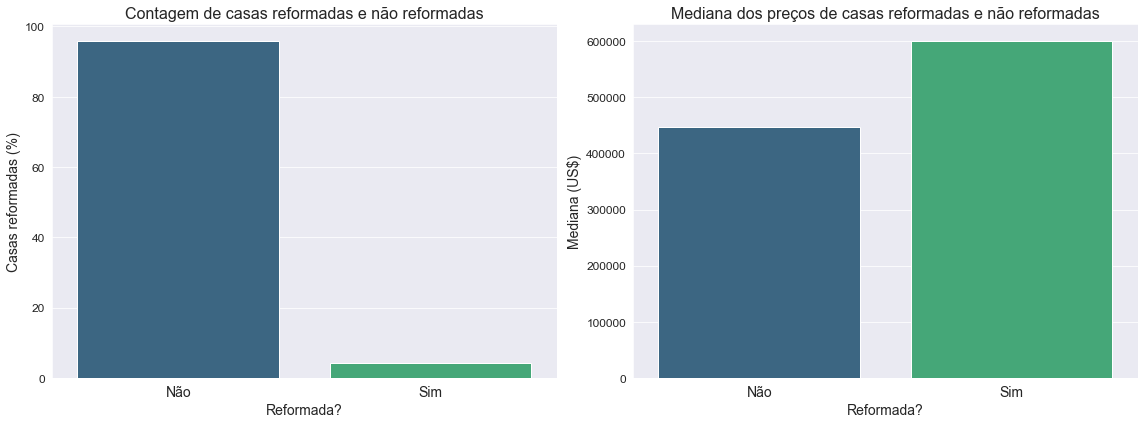

In [54]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(y=ref, x=reformada.index, palette='viridis')
plt.title('Contagem de casas reformadas e não reformadas', fontsize=16)
plt.xticks(size=14)
plt.ylabel('Casas reformadas (%)', fontsize=14)
plt.yticks(size=12)
plt.xlabel('Reformada?', fontsize=14)

plt.subplot(1, 2, 2)
sns.barplot(x=reformada.index, y=mp_reformada, palette='viridis')
plt.title('Mediana dos preços de casas reformadas e não reformadas', fontsize=16)
plt.xticks(size=14)
plt.xlabel('Reformada?', fontsize=14)
plt.yticks(size=12)
plt.ylabel('Mediana (US$)', fontsize=14)

plt.tight_layout()
plt.show()

Por volta de 95% das casas não foram reformadas, enquanto menos de 5% foram (gráfico da esquerda). Porém, as que foram tiveram uma valorização no preço de venda (gráfico da direita).

In [55]:
pct_reformadas = (mp_reformada[1]-mp_reformada[0])/mp_reformada[0]
pct_n_reformadas = (mp_reformada[1]-mp_reformada[0])/mp_reformada[1]
pct_ref = [round(pct_n_reformadas*100, 2), round(pct_reformadas*100, 2)]
pct_ref

[25.33, 33.93]

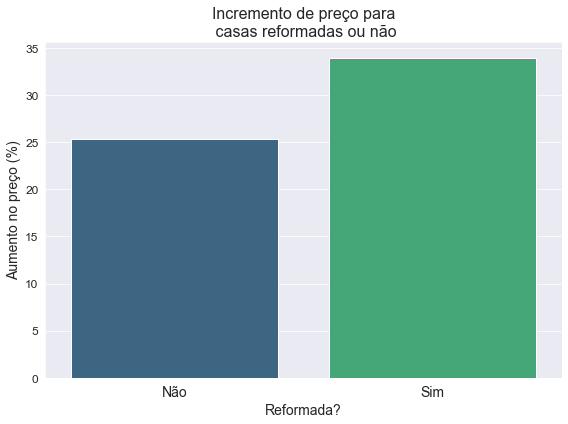

In [56]:
plt.figure(figsize=(8, 6))

sns.barplot(y=pct_ref, x=reformada.index, palette='viridis')
plt.title('Incremento de preço para\n casas reformadas ou não', fontsize=16)
plt.xticks(size=14)
plt.ylabel('Aumento no preço (%)', fontsize=14)
plt.yticks(size=12)
plt.xlabel('Reformada?', fontsize=14)

plt.tight_layout()
plt.show()

Uma reforma proporciona um aumento estimado de **33.9%** no preço de venda da casa. Casas que não são reformadas possuem um preço de venda **25.3%** menor.

# Conclusão

1 - Seria interessante a compra de casas construídas a partir de `1991` e com preços de venda que variam entre `US$ 250000` a `US$1000000`. Nota-se que casas desses grupos de preços possuem, em média, de `3 a 4 quartos`, de `2 a 3 banheiros`, considerando que alguns quartos possuem banheiro e este pode ou não ter chuveiro. A qualidade das contruções para estes grupos é muito boa, assim como sua condição atual. Casas com área habitacional entre `50000` e `60000` também possuem um preço de venda mais alto. A localização também é boa, contendo parques e outros pontos turísticos.

2 - O período mais interessante para venda notado na análise está entre o final do primeiro semestre e início do segundo semestre (2° e 3° trimestres, respectivamente), onde há uma tendência maior no número de vendas e também nos preços praticados.

3 - Reformas podem valorizar o imóvel e elevar seu preço de venda. Para isso, é sugerido levar em consideração a descrição de casas no `item 1`, considerando reformar as que os atributos estiverem abaixo dos citados, como qualidade dos materiais, condições da casa ou quarto sem banheiro, por exemplo.

4 - Uma reforma em casas que apresentem atributos um pouco abaixo dos citados no `item 1` pode aumentar o preço em `33.92%`.